# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 2: Exploratory Data Analysis (EDA)
#Jacob Perrone
## LINK TO DRIVE: ###
https://colab.research.google.com/drive/1prnSTbMFMgC6owtfThF4xCVNT74KoAvf?usp=sharing 

### Goals 

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


-------------------
## Part 1: Salaries

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [ ]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv') 
#salaries = pd.read_csv('./data/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


### 1.1 Your turn! (2 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

Hint: Your solution should have a code cell (2-3 lines of Python) + a text cell (bullet list, explaining the meaning of each variable _to the best of your knowledge_)

In [ ]:
# Enter your code here
print(salaries.head())
print(salaries.info())


      earn     height     sex  ed  age   race
0  50000.0  74.424439    male  16   45  white
1  60000.0  65.537543  female  16   58  white
2  30000.0  63.629198  female  16   29  white
3  50000.0  63.108562  female  16   91  other
4  51000.0  63.402484  female  17   39  white
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1192 non-null   float64
 1   height  1192 non-null   float64
 2   sex     1192 non-null   object 
 3   ed      1192 non-null   int64  
 4   age     1192 non-null   int64  
 5   race    1192 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 56.0+ KB
None


*Enter your text here*

*   earn = salary (presumably annual, in USD)
*   height = height (inch)
*   sex = gender of employee
*   ed = years of education 
*   age = age of employee in years
*   race = ethnicity of employee











--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [ ]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


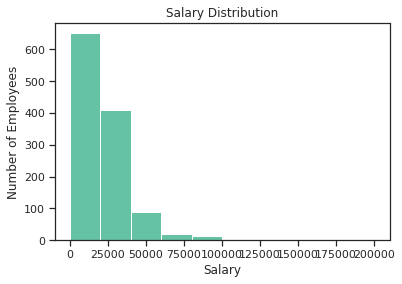

In [ ]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

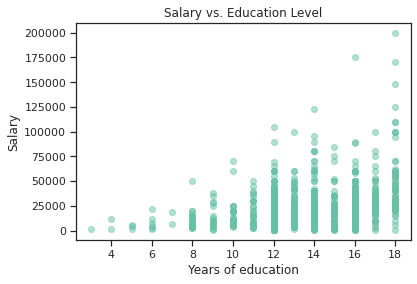

In [ ]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.2 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [ ]:
# Enter your code here
# part 1
gender = np.array(salaries['sex'])
total = salaries['sex'].count()
male_count = salaries['sex'].value_counts()['male']
female_count = salaries['sex'].value_counts()['female']
print(" Gender stats ")
print("total count: ", total)
print("total males: ", male_count, "(",(male_count/total)*100,"%)")
print("total females: ",female_count, "(",(female_count/total)*100,"%)")
#part 2
print(salaries.groupby('sex')['earn'].agg(['min',np.median,max,np.mean,np.average]))




 Gender stats 
total count:  1192
total males:  505 ( 42.36577181208054 %)
total females:  687 ( 57.63422818791947 %)
           min   median       max          mean       average
sex                                                          
female   200.0  15000.0  123000.0  18280.195051  18280.195051
male    1000.0  25000.0  200000.0  29786.130693  29786.130693


###Part 1:### 
I found the total count of employess and then computed the male and female counts and there respective percentages using the value_count function. 
###Part 2:###
I used groupby and aggregation to display the requested values of min, max, median, mean, and average.

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc.. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.3 Your turn! (18-26 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not). 

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. 

**Weight**: 18 pts, i.e., 6 pts per hypothesis. 
Up to 8 bonus points for insightful additional hypotheses, code, and/or comments.  

H1:

         min   median       max          mean       average
age                                                        
18     600.0   3000.0   50000.0   6394.444444   6394.444444
19    1000.0   6500.0   16000.0   7391.666667   7391.666667
20    1000.0   6500.0   20000.0   8657.142857   8657.142857
21     265.0  10500.0   35000.0  10144.807692  10144.807692
22    1200.0  10000.0  100000.0  13472.413793  13472.413793
..       ...      ...       ...           ...           ...
86   25000.0  25000.0   25000.0  25000.000000  25000.000000
87    5000.0   5000.0    5000.0   5000.000000   5000.000000
88   20000.0  20000.0   20000.0  20000.000000  20000.000000
89   25000.0  25000.0   25000.0  25000.000000  25000.000000
91   24000.0  27000.0   50000.0  33666.666667  33666.666667

[72 rows x 5 columns]


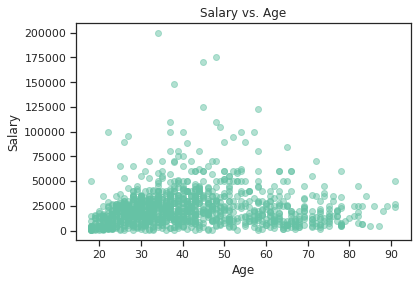

Correlation coefficient:  0.08100297364190615


In [ ]:
# Enter your code here
age = np.array(salaries['age'])
salary = np.array(salaries['earn'])
print(salaries.groupby('age')['earn'].agg(['min',np.median,max,np.mean,np.average]))
#print(salaries.groupby('age')['earn'].quantile([0.25,0.50,0.75,1.00]))
plt.title('Salary vs. Age')
plt.ylabel('Salary')
plt.xlabel('Age');
plt.scatter(age, salary, alpha=0.5)
plt.show()
# Compute Pearson coefficient
corr, _ = pearsonr(salary,age)
print('Correlation coefficient: ',corr)


Using the pearson correlation to determine the correlation of age vs salary where older employees make less, shows a weak positive correlation. Also shown is the min, max, mean, median, and average of each age group. The data does not support the assumption of ageism.

H2:

           min   median       max          mean       average
sex                                                          
female   200.0  15000.0  123000.0  18280.195051  18280.195051
male    1000.0  25000.0  200000.0  29786.130693  29786.130693
sex         
female  0.25      9000.0
        0.50     15000.0
        0.75     25000.0
        1.00    123000.0
male    0.25     16000.0
        0.50     25000.0
        0.75     36000.0
        1.00    200000.0
Name: earn, dtype: float64


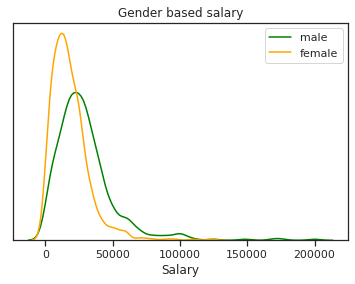

In [ ]:
# Enter your code here
gender = np.array(salaries['sex'])
salary = np.array(salaries['earn'])
print(salaries.groupby('sex')['earn'].agg(['min',np.median,max,np.mean,np.average]))
print(salaries.groupby('sex')['earn'].quantile([0.25,0.50,0.75,1.00]))
male = salaries[salaries['sex'] == 'male']
female = salaries[salaries['sex'] == 'female']
ax = sns.kdeplot(male['earn'], color='green',label='male')
ax = sns.kdeplot(female['earn'], color='orange',label='female')
plt.yticks(())
plt.title('Gender based salary')
plt.xlabel('Salary')
plt.show()

For this hypothesis zi used the same grouby and aggregation as the first but for earn and sex to show the statistics of salary per gender.  I also seperated the genders into a quartile to divide the data into seperate quantiles to see how the genders compared. Lastly zi used seaborn and a KDE plot to visualize the data. These do support that there is a gender bias to salary.

H3:

             min   median       max          mean       average
race                                                           
black      600.0  20000.0   60000.0  19624.214286  19624.214286
hispanic  1400.0  16000.0   55000.0  18263.636364  18263.636364
other     3000.0  20000.0  110000.0  23096.640000  23096.640000
white      200.0  20000.0  200000.0  23882.469161  23882.469161
race          
black     0.25     10000.0
          0.50     20000.0
          0.75     28000.0
          1.00     60000.0
hispanic  0.25      9250.0
          0.50     16000.0
          0.75     26000.0
          1.00     55000.0
other     0.25      8000.0
          0.50     20000.0
          0.75     28000.0
          1.00    110000.0
white     0.25     11000.0
          0.50     20000.0
          0.75     30000.0
          1.00    200000.0
Name: earn, dtype: float64


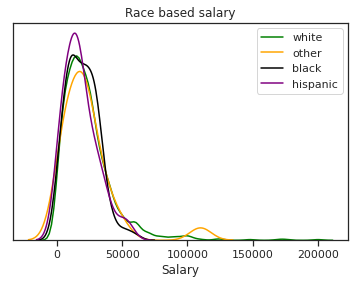

In [ ]:
# Enter your code here
print(salaries.groupby('race')['earn'].agg(['min',np.median,max,np.mean,np.average]))
print(salaries.groupby('race')['earn'].quantile([0.25,0.50,0.75,1.00]))
white = salaries[salaries['race'] == 'white']
other = salaries[salaries['race'] == 'other']
black = salaries[salaries['race'] == 'black']
hispanic = salaries[salaries['race'] == 'hispanic']
ax = sns.kdeplot(white['earn'], color='green',label='white')
ax = sns.kdeplot(other['earn'], color='orange',label='other')
ax = sns.kdeplot(black['earn'], color='black',label='black')
ax = sns.kdeplot(hispanic['earn'], color='purple',label='hispanic')
plt.yticks(())
plt.title('Race based salary')
plt.xlabel('Salary')
plt.show()

Similar to hypothesis 2 I used the grouby and aggragtion to show summary statistics for each rach and then seperated each race into quartiles. I also modified the KDE plot from before to show all races compared to salary. It seems that the data supports that there is race bias to salary.

-------------------
## Part 2: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [ ]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### 2.1 Your turn! (10-12 points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)


In [ ]:
# Enter your code here
three_df = data['cylinders'].value_counts()[3.0]
five_df = data['cylinders'].value_counts()[5.0]
print("3 cylinder: ",three_df)
print("5 cylinder: ",five_df)

data.drop(data[data['cylinders']==3.0].index,inplace= True)
data.drop(data[data['cylinders']==5.0].index,inplace=  True)
print(data.head())
print(data.shape)


3 cylinder:  4
5 cylinder:  3
    mpg  cylinders  displacement  ...  model  origin                   car_name
0  18.0        8.0         307.0  ...   70.0     1.0  chevrolet chevelle malibu
1  15.0        8.0         350.0  ...   70.0     1.0          buick skylark 320
2  18.0        8.0         318.0  ...   70.0     1.0         plymouth satellite
3  16.0        8.0         304.0  ...   70.0     1.0              amc rebel sst
4  17.0        8.0         302.0  ...   70.0     1.0                ford torino

[5 rows x 9 columns]
(385, 9)


In [ ]:
# 2)
print(data.groupby('cylinders')['mpg'].agg(['min',max,np.average]))
# 3) optional
print(data.groupby('mpg')['car_name'].min())

            min   max    average
cylinders                       
4.0        18.0  46.6  29.283920
6.0        15.0  38.0  19.973494
8.0         9.0  26.6  14.963107
mpg
9.0                     hi 1200d
10.0                   chevy c20
11.0            chevrolet impala
12.0    buick electra 225 custom
13.0     amc ambassador brougham
                  ...           
43.4          vw dasher (diesel)
44.0                   vw pickup
44.3        vw rabbit c (diesel)
44.6         honda civic 1500 gl
46.6                   mazda glc
Name: car_name, Length: 124, dtype: object


###Part !:###
I used the value_count to count the vehicles with 3 or 5 cylinders. I used the dataframe drop() to drop those vehicles from the dataframe.
###Part 2:###
I  used the group by and aggregation to display the min, max, and average fuel consumption for each cylinder engine. 
###Part 3 (optional):###
I displayed the dataframe from lowest mpg to highest mpg and the corresponding car name.

--------------------
### Hypotheses and questions

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

### 2.2. Your turn! (24 points)

Write Python code to plot the relationship between (8 pts each):

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


               min  median   max       mean    average
displacement                                          
68.0          29.0    29.0  29.0  29.000000  29.000000
71.0          31.0    31.5  32.0  31.500000  31.500000
72.0          35.0    35.0  35.0  35.000000  35.000000
76.0          31.0    31.0  31.0  31.000000  31.000000
78.0          32.8    32.8  32.8  32.800000  32.800000
...            ...     ...   ...        ...        ...
400.0         11.0    14.0  16.0  13.961538  13.961538
429.0         11.0    12.0  15.0  12.666667  12.666667
440.0         13.0    13.5  14.0  13.500000  13.500000
454.0         14.0    14.0  14.0  14.000000  14.000000
455.0         12.0    14.0  14.0  13.333333  13.333333

[77 rows x 5 columns]


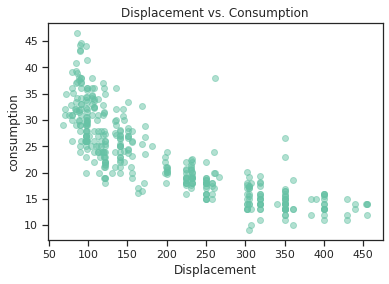

Correlation coefficient:  -0.817887362940059


In [ ]:
# H1
print(data.groupby('displacement')['mpg'].agg(['min',np.median,max,np.mean,np.average]))
displacement = np.array(data['displacement'])
mpg = np.array(data['mpg'])
plt.title('Displacement vs. Consumption')
plt.ylabel('consumption')
plt.xlabel('Displacement');
plt.scatter(displacement, mpg, alpha=0.5)
plt.show()
# Compute Pearson coefficient
corr, _ = pearsonr(mpg,displacement)
print('Correlation coefficient: ',corr)

Using the groupby and aggregation functions to show the displacement and mpg statistics as well as plotting them on a scatterplot and showing the pearson correlation. from the data it appears to support a strong negative correlation between engine displacment and fuel consumption.

         min  median   max  mean  average
weight                                   
1613.0  35.0    35.0  35.0  35.0     35.0
1649.0  31.0    31.0  31.0  31.0     31.0
1755.0  39.1    39.1  39.1  39.1     39.1
1760.0  35.1    35.1  35.1  35.1     35.1
1773.0  31.0    31.0  31.0  31.0     31.0
...      ...     ...   ...   ...      ...
4951.0  12.0    12.0  12.0  12.0     12.0
4952.0  12.0    12.0  12.0  12.0     12.0
4955.0  12.0    12.0  12.0  12.0     12.0
4997.0  11.0    11.0  11.0  11.0     11.0
5140.0  13.0    13.0  13.0  13.0     13.0

[341 rows x 5 columns]


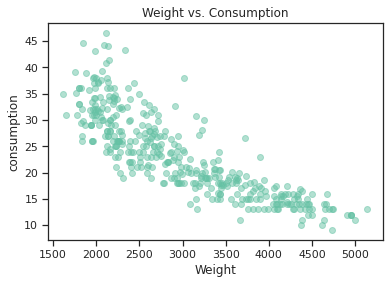

Correlation coefficient:  -0.8426809031318667


In [ ]:
# H2
print(data.groupby('weight')['mpg'].agg(['min',np.median,max,np.mean,np.average]))
weight = np.array(data['weight'])
mpg = np.array(data['mpg'])
plt.title('Weight vs. Consumption')
plt.ylabel('consumption')
plt.xlabel('Weight');
plt.scatter(weight, mpg, alpha=0.5)
plt.show()
# Compute Pearson coefficient
corr, _ = pearsonr(mpg,weight)
print('Correlation coefficient: ',corr)

As with the first hypothesis I used the same functions and a scatter plot to find a correlation between weight and consumption. the data seems to support a strong negative correlation between the weight of the car and the fuel consumption.

             min  median   max       mean    average
horsepower                                          
46.0        26.0    26.0  26.0  26.000000  26.000000
48.0        43.1    43.4  44.3  43.600000  43.600000
49.0        29.0    29.0  29.0  29.000000  29.000000
52.0        29.0    31.9  44.0  34.200000  34.200000
53.0        33.0    33.0  33.0  33.000000  33.000000
...          ...     ...   ...        ...        ...
210.0       11.0    11.0  11.0  11.000000  11.000000
215.0       10.0    13.0  14.0  12.333333  12.333333
220.0       14.0    14.0  14.0  14.000000  14.000000
225.0       12.0    14.0  14.0  13.333333  13.333333
230.0       16.0    16.0  16.0  16.000000  16.000000

[91 rows x 5 columns]


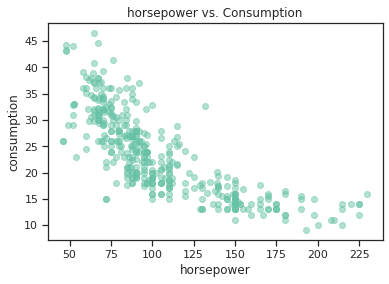

Correlation coefficient:  -0.7802588157322387


In [ ]:
# H3
print(data.groupby('horsepower')['mpg'].agg(['min',np.median,max,np.mean,np.average]))
horsepower = np.array(data['horsepower'])
mpg = np.array(data['mpg'])
plt.title('horsepower vs. Consumption')
plt.ylabel('consumption')
plt.xlabel('horsepower');
plt.scatter(horsepower, mpg, alpha=0.5)
plt.show()
# Compute Pearson coefficient
corr, _ = pearsonr(mpg,horsepower)
print('Correlation coefficient: ',corr)

As per the last two hypothesis I used the same groupby and aggregation and scatteplot graph to show correlation to horsepower and fuel consumption. the data seems to show a strong negative correlation between horsepower and fuel consumption.

---------------------
### Hypotheses H4 and H5
At this point, we will formulate two hypotheses that should be confirmed or refuted based on the data:

- H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).
- H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.



### 2.3 Your turn! (20-26 points)

Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not). 

**Weight**: 20 pts, i.e., 10 pts per hypothesis. 
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments. 

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



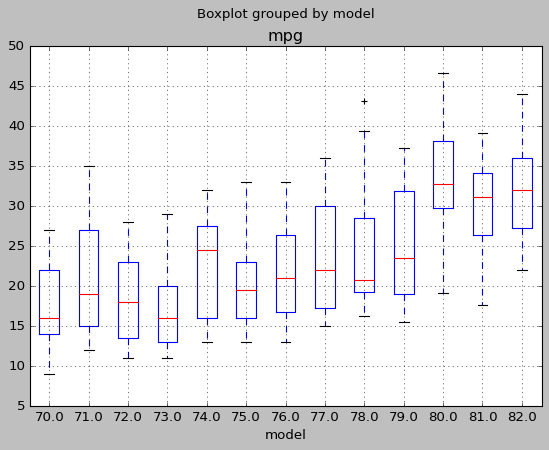

In [ ]:
# H4
plt.style.use('classic')
data.boxplot(column='mpg', by='model')

### H4:###
from the boxplot it appears that fuel consumption has increased since 1972. the boxplot also shows that the lowest mpg was recorded in 1970 with the highest being in 1980. I would also conclude that the median (red line in each box) is the same or higher than 1970's median (conclusion based off boxplot alone, 1973 looks to be the same median from just looking at it).

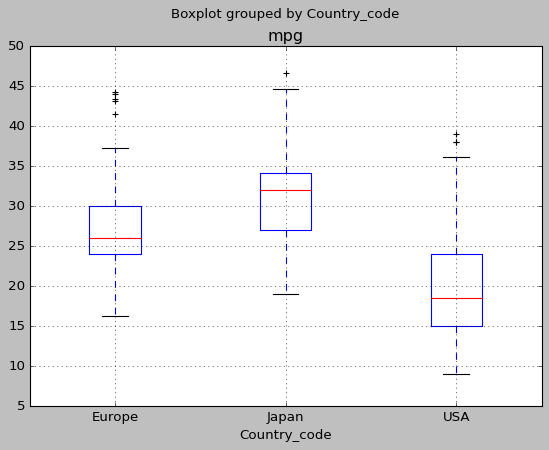

In [ ]:
# H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
plt.style.use('classic')
data.boxplot(column='mpg', by='Country_code')


### H5: ###
from this boxplot, the hypothesis is supported that Japanese cars are more fuel efficient than American and European cars. Japans IQR is also higher than Europe and USA IQR which leads to a higher median in fuel efficiency.

### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?



*   From this assignment I learned how to manipulate data from given sets. I also gained a better understanding of how to use the numpy, pandas, matplotlib, seaborn libraries. I also learned how to interpret data from running the code and analysis.

*   I think the whole assignement was really fun as it gives a practical applicaiton of what data scientists do. For me the most time consuming was figuring out how to plot some of the data. The most enjoyable part of this assignment was learning how to draw conclusions from the data.

*   If i had an extra week to work on this assignment I would have attempted the opional parts of the assignment and also cleaned the data in some instances such as the model year to 1970-1982 instead of just the last part of the model year or cleaning up the trailing decimal points.

